## **Collaborative Filtering**

In [1]:
INPUT_DIR = 'anime-recommendation-database' # Set the input directory path
!dir {INPUT_DIR} #Displays the contents of the directory

 Volume in drive C is Windows-SSD
 Volume Serial Number is D272-C972

 Directory of C:\Users\subas\anime-recommendation-database

25/11/2023  15:04    <DIR>          .
26/11/2023  16:55    <DIR>          ..
25/11/2023  15:02         5,662,362 anime.csv
25/11/2023  15:02     2,031,058,307 animelist.csv
25/11/2023  15:02         7,221,844 anime_with_synopsis.csv
25/11/2023  15:04    <DIR>          html folder
25/11/2023  15:03       817,897,580 rating_complete.csv
25/11/2023  15:03                88 watching_status.csv
               5 File(s)  2,861,840,181 bytes
               3 Dir(s)  336,103,428,096 bytes free


In [2]:
# Imports necessary libraries
import numpy as np
import pandas as pd

# Reads the 'animelist.csv' file into a pandas DataFrame
rating_df = pd.read_csv(INPUT_DIR + '/animelist.csv', 
                        low_memory=False, 
                        usecols=["user_id", "anime_id", "rating"]
                        #, nrows=90000000
                        )
rating_df.head(4) #Displays the first 4 rows of the DataFrame

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,4898,0


In [3]:
# User should rate atleast 400 animies
n_ratings = rating_df['user_id'].value_counts() # Counts the number of ratings per user
rating_df = rating_df[rating_df['user_id'].isin(n_ratings[n_ratings >= 400].index)].copy() # Filters the DataFrame to include only users who have rated at least 400 anime
len(rating_df) # Displays the length of the resulting DataFrame

71418114

In [4]:
# Finds the minimum and maximum ratings in the DataFrame
min_rating = min(rating_df['rating'])
max_rating = max(rating_df['rating'])
# Scales the 'rating' column between 0 and 1
rating_df['rating'] = rating_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float64)
# Calculate the average rating
AvgRating = np.mean(rating_df['rating'])
print('Avg', AvgRating)

Avg 0.40477935891013467


In [5]:
# Identifies duplicated rows in the DataFrame
duplicates = rating_df.duplicated()
# Checks if there are duplicates
if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    # Removes duplicate rows
    rating_df = rating_df[~duplicates]
# Prints the number of duplicates after removal
print('> {} duplicates'.format(rating_df.duplicated().sum()))

> 1 duplicates
> 0 duplicates


In [6]:
# Counts the number of ratings per user
g = rating_df.groupby('user_id')['rating'].count()

# Select the top 20 users with the most ratings
top_users = g.dropna().sort_values(ascending=False)[:20]

# Join the top users with the original DataFrame
top_r = rating_df.join(top_users, rsuffix='_r', how='inner', on='user_id')

# Count the number of ratings per anime
g = rating_df.groupby('anime_id')['rating'].count()

# Select the top 20 anime with the most ratings
top_animes = g.dropna().sort_values(ascending=False)[:20]

# Join the top anime with the DataFrame containing the top users
top_r = top_r.join(top_animes, rsuffix='_r', how='inner', on='anime_id')

# Create a cross-tabulation of user ratings for the top users and top anime
pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc=np.sum)

anime_id,226,1535,1575,2001,2167,4224,5081,5114,6547,6746,9253,9989,10620,11757,15809,16498,19815,20507,22319,30276
user_id,,,,,,,,,,,,,,,,,,,,
20807,1.0,1.0,1.0,1.0,0.8,1.0,0.9,1.0,1.0,1.0,1.0,0.9,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.0
50485,0.0,0.6,1.0,1.0,0.9,1.0,1.0,1.0,1.0,0.9,1.0,0.9,0.6,1.0,1.0,0.9,1.0,1.0,1.0,0.8
63900,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.8,0.0,0.8,0.8,0.8
68042,0.8,1.0,0.9,1.0,0.7,0.9,1.0,0.9,0.7,0.8,0.9,0.8,0.4,0.4,0.6,0.9,0.3,0.2,0.5,0.9
85472,0.7,0.0,0.0,1.0,0.9,0.9,0.0,0.0,1.0,0.0,0.8,0.0,0.8,0.9,0.8,0.8,0.7,0.7,0.7,0.9
92529,0.9,0.9,1.0,1.0,0.0,0.8,0.0,0.9,0.9,0.0,1.0,0.0,0.8,0.9,0.8,0.9,0.9,0.8,0.8,1.0
122341,0.2,0.3,0.2,0.7,0.4,0.3,0.3,0.8,0.5,0.6,0.7,0.3,0.2,0.1,0.3,0.1,0.4,0.4,0.2,0.6
131988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140590,0.3,0.6,0.5,0.8,0.6,0.8,0.8,0.9,0.5,0.8,0.9,0.7,0.3,0.4,0.6,0.5,0.7,0.7,0.5,0.7


## **Data Preprocessing**

In [7]:
# Encoding categorical data
# Gets unique user IDs and create dictionaries for mapping
user_ids = rating_df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}

# Maps the encoded user IDs to a new 'user' column in the DataFrame
rating_df["user"] = rating_df["user_id"].map(user2user_encoded)
n_users = len(user2user_encoded)

# Gets unique anime IDs and create dictionaries for mapping
anime_ids = rating_df["anime_id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}

# Maps the encoded anime IDs to a new 'anime' column in the DataFrame
rating_df["anime"] = rating_df["anime_id"].map(anime2anime_encoded)
n_animes = len(anime2anime_encoded)

# Displays the number of users and anime, as well as the min and max ratings
print("Num of users: {}, Num of animes: {}".format(n_users, n_animes))
print("Min rating: {}, Max rating: {}".format(min(rating_df['rating']), max(rating_df['rating'])))

Num of users: 91641, Num of animes: 17560
Min rating: 0.0, Max rating: 1.0


In [8]:
# Shuffles the DataFrame using a random seed for reproducibility
rating_df = rating_df.sample(frac=1, random_state=73)

# Extracts features (X) and target variable (y)
X = rating_df[['user', 'anime']].values
y = rating_df["rating"]

In [9]:
# Defines the size of the test set
test_set_size = 10000 #10k for test set
# Calculates the index where the training set ends
train_indices = rating_df.shape[0] - test_set_size 

# Splits the data into training and test sets
X_train, X_test, y_train, y_test = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

# Displays the number of ratings in the training and test sets
print('> Train set ratings: {}'.format(len(y_train)))
print('> Test set ratings: {}'.format(len(y_test)))

> Train set ratings: 71408113
> Test set ratings: 10000


In [10]:
# Extracts user and anime features from the training set
# Creates a list (X_train_array) containing the user and anime features as separate arrays
# Extracts user and anime features from the test set
# Creates a list (X_test_array) containing the user and anime features as separate arrays
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [11]:
# Accelerator check
# Imports TensorFlow library
import tensorflow as tf

# Sets the flag for TPU initialization
TPU_INIT = False

# Checks if TPU initialization is enabled
if TPU_INIT:
    # TPU configuration
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='your_tpu_name') # Replace 'your_tpu_name' with the actual TPU name
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # If TPU initialization is not enabled, print GPU information
    !nvidia-smi

# Print the TensorFlow version
print(tf.__version__)


Sun Nov 26 17:00:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.99       Driver Version: 527.99       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   40C    P8    16W /  40W |      0MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **Model Building**

In [12]:
# Import TensorFlow library
import tensorflow as tf
# Import specific modules from TensorFlow Keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [13]:
# Imports necessary modules from TensorFlow Keras
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten

# Define a function to create the RecommenderNet model
def RecommenderNet():
    embedding_size = 128 # Size of the embedding vectors

    # Define input layer for user IDs
    user = Input(name = 'user', shape = [1])
    # Create an Embedding layer for user IDs
    user_embedding = Embedding(name = 'user_embedding',
                       input_dim = n_users, 
                       output_dim = embedding_size)(user)
    
    # Define input layer for anime IDs
    anime = Input(name = 'anime', shape = [1])
    # Create an Embedding layer for anime IDs
    anime_embedding = Embedding(name = 'anime_embedding',
                       input_dim = n_animes, 
                       output_dim = embedding_size)(anime)
    
    #x = Concatenate()([user_embedding, anime_embedding])
    x = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, anime_embedding])
    x = Flatten()(x)
      
    # Fully connected layer with ReLU activation
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x) # Apply sigmoid activation for binary classification
   
    # Create the final model
    model = Model(inputs=[user, anime], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=["mae", "mse"], optimizer='Adam')
    
    return model

# Check if TPU initialization is enabled and create the model accordingly
if TPU_INIT:    
    with tpu_strategy.scope():
        model = RecommenderNet()
else:
    model = RecommenderNet()

# Display the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user (InputLayer)           [(None, 1)]                  0         []                            
                                                                                                  
 anime (InputLayer)          [(None, 1)]                  0         []                            
                                                                                                  
 user_embedding (Embedding)  (None, 1, 128)               1173004   ['user[0][0]']                
                                                          8                                       
                                                                                                  
 anime_embedding (Embedding  (None, 1, 128)               2247680   ['anime[0][0]']           

In [14]:
# Import necessary callbacks from TensorFlow Keras
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

# Set initial, minimum, and maximum learning rates, and batch size
start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 100000

# Adjust max_lr and batch_size for TPUs
if TPU_INIT:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

# Set up learning rate schedule parameters
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

# Learning rate schedule function
def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


# Create a LearningRateScheduler callback with the defined schedule function    
lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)


# Set up ModelCheckpoint callback to save the best model weights
checkpoint_filepath = './weights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True)


# Set up EarlyStopping callback for early stopping based on validation loss
early_stopping = EarlyStopping(patience = 3, monitor='val_loss', 
                               mode='min', restore_best_weights=True)

# List of callbacks to be used during model training
my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping,   
]

In [15]:
# Train the model using the fit method
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

# Load the best weights based on the ModelCheckpoint callback
model.load_weights(checkpoint_filepath)

Epoch 1/20
715/715 [==============================] - 325s 445ms/step - loss: 0.8030 - mae: 0.3847 - mse: 0.1998 - val_loss: 0.7971 - val_mae: 0.3845 - val_mse: 0.1992 - lr: 1.0000e-05
Epoch 2/20
715/715 [==============================] - 304s 426ms/step - loss: 0.7982 - mae: 0.3832 - mse: 0.1980 - val_loss: 0.7942 - val_mae: 0.3840 - val_mse: 0.1981 - lr: 1.8000e-05
Epoch 3/20
715/715 [==============================] - 313s 438ms/step - loss: 0.7893 - mae: 0.3803 - mse: 0.1946 - val_loss: 0.7859 - val_mae: 0.3816 - val_mse: 0.1950 - lr: 2.6000e-05
Epoch 4/20
715/715 [==============================] - 318s 445ms/step - loss: 0.7680 - mae: 0.3717 - mse: 0.1860 - val_loss: 0.7541 - val_mae: 0.3679 - val_mse: 0.1819 - lr: 3.4000e-05
Epoch 5/20
715/715 [==============================] - 323s 452ms/step - loss: 0.6935 - mae: 0.3355 - mse: 0.1546 - val_loss: 0.6547 - val_mae: 0.3164 - val_mse: 0.1397 - lr: 4.2000e-05
Epoch 6/20
715/715 [==============================] - 301s 421ms/step - los

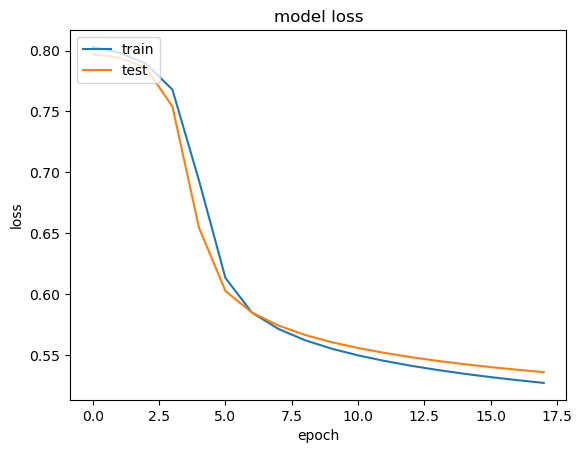

In [16]:
# Import the Matplotlib library for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the training and validation loss over epochs
plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

## **Extracting weights from model**

In [17]:
def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = extract_weights('anime_embedding', model)
user_weights = extract_weights('user_embedding', model)

### **anime meta data**

In [18]:
df = pd.read_csv(INPUT_DIR + '/anime.csv', low_memory=True)
df = df.replace("Unknown", np.nan)

In [19]:
# Fixing Names
def getAnimeName(anime_id):
    try:
        name = df[df.anime_id == anime_id].eng_version.values[0]
        if name is np.nan:
            name = df[df.anime_id == anime_id].Name.values[0]
    except:
        print('error')
    
    return name

df['anime_id'] = df['MAL_ID']
df["eng_version"] = df['English name']
df['eng_version'] = df.anime_id.apply(lambda x: getAnimeName(x))

df.sort_values(by=['Score'], 
               inplace=True,
               ascending=False, 
               kind='quicksort',
               na_position='last')

df = df[["anime_id", "eng_version", 
         "Score", "Genres", "Episodes", 
         "Type", "Premiered", "Members"]]

In [20]:
def getAnimeFrame(anime):
    if isinstance(anime, int):
        return df[df.anime_id == anime]
    if isinstance(anime, str):
        return df[df.eng_version == anime]

### **sypnopsis data**

In [21]:
cols = ["MAL_ID", "Name", "Genres", "sypnopsis"]
sypnopsis_df = pd.read_csv(INPUT_DIR + '/anime_with_synopsis.csv', usecols=cols)

def getSypnopsis(anime):
    if isinstance(anime, int):
        return sypnopsis_df[sypnopsis_df.MAL_ID == anime].sypnopsis.values[0]
    if isinstance(anime, str):
        return sypnopsis_df[sypnopsis_df.Name == anime].sypnopsis.values[0]

## **Task 1**: Finding Similar Animes (Item Based Recommendation)

In [22]:
# Set the Pandas option to display the full content of columns
pd.set_option("max_colwidth", None)

# Define a function to find similar animes
def find_similar_animes(name, n=10, return_dist=False, neg=False):
    try:
        # Get the anime_id for the provided anime name
        index = getAnimeFrame(name).anime_id.values[0]
        encoded_index = anime2anime_encoded.get(index)
        weights = anime_weights
        
        # Calculate dot product to find similarity
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
       
        # Adjust the number of similar animes to include
        n = n + 1            
        
        # Select either top or bottom similar animes based on the 'neg' parameter
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('animes closest to {}'.format(name))

        if return_dist:
            return dists, closest
        
        # Get the DataFrame containing anime information
        rindex = df

        SimilarityArr = []

        # Iterate through the closest animes
        for close in closest:
            decoded_id = anime_encoded2anime.get(close)
            sypnopsis = getSypnopsis(decoded_id)
            anime_frame = getAnimeFrame(decoded_id)
            
            anime_name = anime_frame.eng_version.values[0]
            genre = anime_frame.Genres.values[0]
            similarity = dists[close]
            
            # Create a dictionary with anime information and similarity score
            SimilarityArr.append({"anime_id": decoded_id, "name": anime_name,
                                  "similarity": similarity,"genre": genre,
                                  'sypnopsis': sypnopsis})
            
        # Create a DataFrame from the list of similar animes and sort by similarity
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        
        # Drop the 'anime_id' column and exclude the queried anime
        return Frame[Frame.anime_id != index].drop(['anime_id'], axis=1)

    except:
        print('{}!, Not Found in Anime list'.format(name))

In [23]:
find_similar_animes('Dragon Ball Z', n=5, neg=False)

animes closest to Dragon Ball Z


,name,similarity,genre,sypnopsis
4,Dragon Ball,0.968891,"Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power","Gokuu Son is a young boy who lives in the woods all alone—that is, until a girl named Bulma runs into him in her search for a set of magical objects called the ""Dragon Balls."" Since the artifacts are said to grant one wish to whoever collects all seven, Bulma hopes to gather them and wish for a perfect boyfriend. Gokuu happens to be in possession of a dragon ball, but unfortunately for Bulma, he refuses to part ways with it, so she makes him a deal: he can tag along on her journey if he lets her borrow the dragon ball's power. With that, the two set off on the journey of a lifetime. They don't go on the journey alone. On the way, they meet the old Muten-Roshi and wannabe disciple Kuririn, with whom Gokuu trains to become a stronger martial artist for the upcoming World Martial Arts Tournament. However, it's not all fun and games; the ability to make any wish come true is a powerful one, and there are others who would do much worse than just wishing for a boyfriend. To stop those who would try to abuse the legendary power, they train to become stronger fighters, using their newfound strength to help the people around them along the way."
3,Naruto,0.956694,"Action, Adventure, Comedy, Super Power, Martial Arts, Shounen","oments prior to Naruto Uzumaki's birth, a huge demon known as the Kyuubi, the Nine-Tailed Fox, attacked Konohagakure, the Hidden Leaf Village, and wreaked havoc. In order to put an end to the Kyuubi's rampage, the leader of the village, the Fourth Hokage, sacrificed his life and sealed the monstrous beast inside the newborn Naruto. Now, Naruto is a hyperactive and knuckle-headed ninja still living in Konohagakure. Shunned because of the Kyuubi inside him, Naruto struggles to find his place in the village, while his burning desire to become the Hokage of Konohagakure leads him not only to some great new friends, but also some deadly foes."
2,Code Geass:Lelouch of the Rebellion R2,0.939043,"Action, Military, Sci-Fi, Super Power, Drama, Mecha","One year has passed since the Black Rebellion, a failed uprising against the Holy Britannian Empire led by the masked vigilante Zero, who is now missing. At a loss without their revolutionary leader, Area 11's resistance group—the Black Knights—find themselves too powerless to combat the brutality inflicted upon the Elevens by Britannia, which has increased significantly in order to crush any hope of a future revolt. Lelouch Lamperouge, having lost all memory of his double life, is living peacefully alongside his friends as a high school student at Ashford Academy. His former partner C.C., unable to accept this turn of events, takes it upon herself to remind him of his past purpose, hoping that the mastermind Zero will rise once again to finish what he started, in this thrilling conclusion to the series."
1,Death Note,0.936128,"Mystery, Police, Psychological, Supernatural, Thriller, Shounen","shinigami, as a god of death, can kill any person—provided they see their victim's face and write their victim's name in a notebook called a Death Note. One day, Ryuk, bored by the shinigami lifestyle and interested in seeing how a human would use a Death Note, drops one into the human realm. High school student and prodigy Light Yagami stumbles upon the Death Note and—since he deplores the state of the world—tests the deadly notebook by writing a criminal's name in it. When the criminal dies immediately following his experiment with the Death Note, Light is greatly surprised and quickly recognizes how devastating the power that has fallen into his hands could be. With this divine capability, Light decides to extinguish all criminals in order to build a new world where crime does not exist and people worship him as a god. Police, however, quickly discover that a serial killer is targeting criminals and, consequently, try to apprehend the culprit. To do this, the Jap

In [24]:
find_similar_animes('Your Name.', n=5, neg=False)

animes closest to Your Name.


,name,similarity,genre,sypnopsis
4,A Silent Voice,0.991338,"Drama, School, Shounen","s a wild youth, elementary school student Shouya Ishida sought to beat boredom in the cruelest ways. When the deaf Shouko Nishimiya transfers into his class, Shouya and the rest of his class thoughtlessly bully her for fun. However, when her mother notifies the school, he is singled out and blamed for everything done to her. With Shouko transferring out of the school, Shouya is left at the mercy of his classmates. He is heartlessly ostracized all throughout elementary and middle school, while teachers turn a blind eye. Now in his third year of high school, Shouya is still plagued by his wrongdoings as a young boy. Sincerely regretting his past actions, he sets out on a journey of redemption: to meet Shouko once more and make amends. Koe no Katachi tells the heartwarming tale of Shouya's reunion with Shouko and his honest attempts to redeem himself, all while being continually haunted by the shadows of his past."
3,One Punch Man,0.984822,"Action, Sci-Fi, Comedy, Parody, Super Power, Supernatural","The seemingly ordinary and unimpressive Saitama has a rather unique hobby: being a hero. In order to pursue his childhood dream, he trained relentlessly for three years—and lost all of his hair in the process. Now, Saitama is incredibly powerful, so much so that no enemy is able to defeat him in battle. In fact, all it takes to defeat evildoers with just one punch has led to an unexpected problem—he is no longer able to enjoy the thrill of battling and has become quite bored. This all changes with the arrival of Genos, a 19-year-old cyborg, who wishes to be Saitama's disciple after seeing what he is capable of. Genos proposes that the two join the Hero Association in order to become certified heroes that will be recognized for their positive contributions to society, and Saitama, shocked that no one knows who he is, quickly agrees. And thus begins the story of One Punch Man , an action-comedy that follows an eccentric individual who longs to fight strong enemies that can hopefully give him the excitement he once felt and just maybe, he'll become popular in the process."
2,My Hero Academia,0.980152,"Action, Comedy, School, Shounen, Super Power","The appearance of ""quirks,"" newly discovered super powers, has been steadily increasing over the years, with 80 percent of humanity possessing various abilities from manipulation of elements to shapeshifting. This leaves the remainder of the world completely powerless, and Izuku Midoriya is one such individual. Since he was a child, the ambitious middle schooler has wanted nothing more than to be a hero. Izuku's unfair fate leaves him admiring heroes and taking notes on them whenever he can. But it seems that his persistence has borne some fruit: Izuku meets the number one hero and his personal idol, All Might. All Might's quirk is a unique ability that can be inherited, and he has chosen Izuku to be his successor! Enduring many months of grueling training, Izuku enrolls in UA High, a prestigious high school famous for its excellent hero training program, and this year's freshmen look especially promising. With his bizarre but talented classmates and the looming threat of a villainous organization, Izuku will soon learn what it really means to be a hero."
1,My Hero Academia 2,0.979531,"Action, Comedy, Super Power, School, Shounen","UA Academy, not even a violent attack can disrupt their most prestigious event: the school sports festival. Renowned across Japan, this festival is an opportunity for aspiring heroes to showcase their abilities, both to the public and potential recruiters. However, the path to glory is never easy, especially for Izuku Midoriya—whose quirk possesses great raw power but is also cripplingly inefficient. Pitted against his talented classmates, such as the fire and ice wielding Shouto Todoroki, Izuku must utilize his sharp wits and master his surroundings to achieve victory and prove to

In [25]:
find_similar_animes('Sword Art Online', n=5, neg=False)

animes closest to Sword Art Online


,name,similarity,genre,sypnopsis
4,"No Game, No Life",0.962602,"Game, Adventure, Comedy, Supernatural, Ecchi, Fantasy","No Game No Life is a surreal comedy that follows Sora and Shiro, shut-in NEET siblings and the online gamer duo behind the legendary username ""Blank."" They view the real world as just another lousy game; however, a strange e-mail challenging them to a chess match changes everything—the brother and sister are plunged into an otherworldly realm where they meet Tet, the God of Games. The mysterious god welcomes Sora and Shiro to Disboard, a world where all forms of conflict—from petty squabbles to the fate of whole countries—are settled not through war, but by way of high-stake games. This system works thanks to a fundamental rule wherein each party must wager something they deem to be of equal value to the other party's wager. In this strange land where the very idea of humanity is reduced to child's play, the indifferent genius gamer duo of Sora and Shiro have finally found a real reason to keep playing games: to unite the sixteen races of Disboard, defeat Tet, and become the gods of this new, gaming-is-everything world."
3,Tokyo Ghoul,0.959431,"Action, Mystery, Horror, Psychological, Supernatural, Drama, Seinen","Tokyo has become a cruel and merciless city—a place where vicious creatures called ""ghouls"" exist alongside humans. The citizens of this once great metropolis live in constant fear of these bloodthirsty savages and their thirst for human flesh. However, the greatest threat these ghouls pose is their dangerous ability to masquerade as humans and blend in with society. Based on the best-selling supernatural horror manga by Sui Ishida, Tokyo Ghoul follows Ken Kaneki, a shy, bookish college student, who is instantly drawn to Rize Kamishiro, an avid reader like himself. However, Rize is not exactly who she seems, and this unfortunate meeting pushes Kaneki into the dark depths of the ghouls' inhuman world. In a twist of fate, Kaneki is saved by the enigmatic waitress Touka Kirishima, and thus begins his new, secret life as a half-ghoul/half-human who must find a way to integrate into both societies."
2,The Devil is a Part-Timer!,0.946412,"Comedy, Demons, Supernatural, Romance, Fantasy","Striking fear into the hearts of mortals, the Demon Lord Satan begins to conquer the land of Ente Isla with his vast demon armies. However, while embarking on this brutal quest to take over the continent, his efforts are foiled by the hero Emilia, forcing Satan to make his swift retreat through a dimensional portal only to land in the human world. Along with his loyal general Alsiel, the demon finds himself stranded in modern-day Tokyo and vows to return and complete his subjugation of Ente Isla—that is, if they can find a way back! Powerless in a world without magic, Satan assumes the guise of a human named Sadao Maou and begins working at MgRonald's—a local fast-food restaurant—to make ends meet. He soon realizes that his goal of conquering Ente Isla is just not enough as he grows determined to climb the corporate ladder and become the ruler of Earth, one satisfied customer at a time! Whether it's part-time work, household chores, or simply trying to pay the rent on time, Hataraku Maou-sama! presents a hilarious view of the most mundane aspects of everyday life, all through the eyes of a hapless demon lord."
1,Naruto,0.941287,"Action, Adventure, Comedy, Super Power, Martial Arts, Shounen","oments prior to Naruto Uzumaki's birth, a huge demon known as the Kyuubi, the Nine-Tailed Fox, attacked Konohagakure, the Hidden Leaf Village, and wreaked havoc. In order to put an end to the Kyuubi's rampage, the leader of the village, the Fourth Hokage, sacrificed his life and sealed the monstrous beast inside the newborn Naruto. Now, Naruto is a hyperactive and knuckle-headed ninja still living in Konohagakure. Shunned because of the Kyuubi inside him, Naruto struggles to find his place in the village, while his burning desire to

![](https://steamuserimages-a.akamaihd.net/ugc/993512070845192516/C18040A95DB14DD58438DDDEBF721BA8ABAD0E84/)

In [26]:
find_similar_animes('Black Clover', n=5, neg=False)

animes closest to Black Clover


,name,similarity,genre,sypnopsis
4,Gleipnir,0.623096,"Action, Mystery, Supernatural, Ecchi, Seinen","Shuuichi Kagaya is what one would consider an average high school student, but sometimes, he turns into a monster. He doesn't know how or why he got his abilities, only that he would prefer no one knows about them. One night, he finds a building ablaze with a girl trapped inside. Deciding to save her, he transforms and carries her to safety, but accidentally drops his phone. The next day, the girl he saved—Claire Aoki—finds him and confronts him about his monster identity. She even goes so far as to push him off the school roof to prove her theory after Shuuichi denies her allegations. Desperate to save himself, he transforms, and Claire snaps a picture in order to blackmail him into telling her everything he knows about monsters, which, ironically, isn't much. As it turns out, Claire has a secret of her own: she has been searching for her sister, who also became a monster. She enlists Shuuichi's help to track her down, but they aren't the only ones searching for answers."
3,Fire Force,0.614839,"Action, Supernatural, Shounen","Spontaneous Human Combustion: a chaotic phenomenon that has plagued humanity for years, randomly transforming ordinary people into flaming, violent creatures known as Infernals. While Infernals make up the first-generation accounts of Human Combustion, the second and third generations became known as pyrokinetics—people gifted with the ability to manipulate and control their flames while remaining human. To combat the Infernal threat and discover the cause, the Tokyo Armed Forces, Fire Defense Agency, and Holy Church of Sol produced their answer: the Special Fire Force. Young and eager third-generation pyrokinetic Shinra Kusakabe, nicknamed Devil's Footprints for his explosive ability to ignite his feet at will, becomes a member of the lively Special Fire Force Company 8. Upholding the brigade's duty to extinguish the blazing Infernals and lay their souls to rest, Shinra is determined to become a hero who will save the lives of those threatened by the flame terror. However, this is not the hero's game Shinra imagined. The Fire Force is a fractured mess of feuding brigades, abnormal Infernal sightings are increasing all over Tokyo, and a shadowy group is claiming to have answers to the strange fire that caused the death of Shinra's family 12 years ago. Faced with many obstacles within and outside the Fire Force, Shinra fights to uncover the truth behind the burning mysteries that have kept him in the dark."
2,Seven Senses of the Re'Union,0.606204,"Action, Fantasy, Game, Sci-Fi","sahi's life in reality ended simultaneously when she died playing Union , a world-renowned online RPG. The members of Subaru went separate ways when Union shut down due to Asahi's death. Six years later, Haruto logs onto a renewed version of Re'Union and reunites with Asahi who had died. Is it really her or just an electronic ghost? The former team members reunite and enter the mysterious and deadly online game to find out. (Source: TBS Global Business)"
1,Boruto:Naruto Next Generations,0.600506,"Action, Adventure, Super Power, Martial Arts, Shounen","Following the successful end of the Fourth Shinobi World War, Konohagakure has been enjoying a period of peace, prosperity, and extraordinary technological advancement. This is all due to the efforts of the Allied Shinobi Forces and the village's Seventh Hokage, Naruto Uzumaki. Now resembling a modern metropolis, Konohagakure has changed, particularly the life of a shinobi. Under the watchful eye of Naruto and his old comrades, a new generation of shinobi has stepped up to learn the ways of the ninja. Boruto Uzumaki is often the center of attention as the son of the Seventh Hokage. Despite having inherited Naruto's boisterous and stubborn demeanor, Boruto is considered a prodigy and is able to unleash his potential with the help of supportive friends and family. Unfortunately, this ha

In [27]:
find_similar_animes('Death Note', n=5, neg=False)

animes closest to Death Note


,name,similarity,genre,sypnopsis
4,Fullmetal Alchemist:Brotherhood,0.989738,"Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen","""In order for something to be obtained, something of equal value must be lost."" Alchemy is bound by this Law of Equivalent Exchange—something the young brothers Edward and Alphonse Elric only realize after attempting human transmutation: the one forbidden act of alchemy. They pay a terrible price for their transgression—Edward loses his left leg, Alphonse his physical body. It is only by the desperate sacrifice of Edward's right arm that he is able to affix Alphonse's soul to a suit of armor. Devastated and alone, it is the hope that they would both eventually return to their original bodies that gives Edward the inspiration to obtain metal limbs called ""automail"" and become a state alchemist, the Fullmetal Alchemist. Three years of searching later, the brothers seek the Philosopher's Stone, a mythical relic that allows an alchemist to overcome the Law of Equivalent Exchange. Even with military allies Colonel Roy Mustang, Lieutenant Riza Hawkeye, and Lieutenant Colonel Maes Hughes on their side, the brothers find themselves caught up in a nationwide conspiracy that leads them not only to the true nature of the elusive Philosopher's Stone, but their country's murky history as well. In between finding a serial killer and racing against time, Edward and Alphonse must ask themselves if what they are doing will make them human again... or take away their humanity."
3,Code Geass:Lelouch of the Rebellion R2,0.985156,"Action, Military, Sci-Fi, Super Power, Drama, Mecha","One year has passed since the Black Rebellion, a failed uprising against the Holy Britannian Empire led by the masked vigilante Zero, who is now missing. At a loss without their revolutionary leader, Area 11's resistance group—the Black Knights—find themselves too powerless to combat the brutality inflicted upon the Elevens by Britannia, which has increased significantly in order to crush any hope of a future revolt. Lelouch Lamperouge, having lost all memory of his double life, is living peacefully alongside his friends as a high school student at Ashford Academy. His former partner C.C., unable to accept this turn of events, takes it upon herself to remind him of his past purpose, hoping that the mastermind Zero will rise once again to finish what he started, in this thrilling conclusion to the series."
2,Attack on Titan,0.980720,"Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen","Centuries ago, mankind was slaughtered to near extinction by monstrous humanoid creatures called titans, forcing humans to hide in fear behind enormous concentric walls. What makes these giants truly terrifying is that their taste for human flesh is not born out of hunger but what appears to be out of pleasure. To ensure their survival, the remnants of humanity began living within defensive barriers, resulting in one hundred years without a single titan encounter. However, that fragile calm is soon shattered when a colossal titan manages to breach the supposedly impregnable outer wall, reigniting the fight for survival against the man-eating abominations. After witnessing a horrific personal loss at the hands of the invading creatures, Eren Yeager dedicates his life to their eradication by enlisting into the Survey Corps, an elite military unit that combats the merciless humanoids outside the protection of the walls. Based on Hajime Isayama's award-winning manga, Shingeki no Kyojin follows Eren, along with his adopted sister Mikasa Ackerman and his childhood friend Armin Arlert, as they join the brutal war against the titans and race to discover a way of defeating them before the last walls are breached."
1,Code Geass:Lelouch of the Rebellion,0.977143,"Action, Military, Sci-Fi, Super Power, Drama, Mecha, School","In the year 2010, the Holy Empire of Britannia is establishing itself as a dominant military nation, starting with 

## **Task 2**: Finding Similar Users (User Based Recommendation)

In [28]:
print('> picking up random user')

ratings_per_user = rating_df.groupby('user_id').size()
random_user = ratings_per_user[ratings_per_user < 500].sample(1, random_state=None).index[0]
print('> user_id:', random_user)

> picking up random user
> user_id: 323306


In [29]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_users(item_input, n=10,return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user2user_encoded.get(index)
        weights = user_weights
    
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('> users similar to #{}'.format(item_input))

        if return_dist:
            return dists, closest
        
        rindex = df
        SimilarityArr = []
        
        for close in closest:
            similarity = dists[close]

            if isinstance(item_input, int):
                decoded_id = user_encoded2user.get(close)
                SimilarityArr.append({"similar_users": decoded_id, 
                                      "similarity": similarity})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", 
                                                        ascending=False)
        
        return Frame
    
    except:
        print('{}!, Not Found in User list'.format(name))

In [30]:
similar_users = find_similar_users(int(random_user), 
                                   n=5, 
                                   neg=False)

similar_users = similar_users[similar_users.similarity > 0.4]
similar_users = similar_users[similar_users.similar_users != random_user]
similar_users.head(5)

> users similar to #323306


,similar_users,similarity
4,92095,0.477141
3,37621,0.447572
2,162584,0.437416
1,350609,0.431532
0,26525,0.423429


## **User preferences**

In [31]:
from wordcloud import WordCloud
from collections import defaultdict
import matplotlib.pyplot as plt

def showWordCloud(all_genres):
    genres_cloud = WordCloud(width=700, height=400, 
                             background_color='white', 
                             colormap='gnuplot').generate_from_frequencies(all_genres)
    
    plt.figure(figsize=(10,8)) 
    plt.imshow(genres_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def getFavGenre(frame, plot=False):
        frame.dropna(inplace=False)
        all_genres = defaultdict(int)
        
        genres_list = []
        for genres in frame['Genres']:
            if isinstance(genres, str):
                for genre in genres.split(','):
                    genres_list.append(genre)
                    all_genres[genre.strip()] += 1    
        if plot:
            showWordCloud(all_genres)
        
        return genres_list

    
def get_user_preferences(user_id, plot=False, verbose=0):
    animes_watched_by_user = rating_df[rating_df.user_id==user_id]
    user_rating_percentile = np.percentile(animes_watched_by_user.rating, 75)
    animes_watched_by_user = animes_watched_by_user[animes_watched_by_user.rating >= user_rating_percentile]
    top_animes_user = (
        animes_watched_by_user.sort_values(by="rating", ascending=False)#.head(10)
        .anime_id.values
    )
    
    anime_df_rows = df[df["anime_id"].isin(top_animes_user)]
    anime_df_rows = anime_df_rows[["eng_version", "Genres"]]
    
    if verbose != 0:
        print("> User #{} has rated {} movies (avg. rating = {:.1f})".format(
          user_id, len(animes_watched_by_user),
          animes_watched_by_user['rating'].mean(),
        ))
    
        print('> preferred genres')
    
    if plot:
        getFavGenre(anime_df_rows, plot)
        
    return anime_df_rows#.eng_version.values

> User #323306 has rated 155 movies (avg. rating = 1.0)
> preferred genres


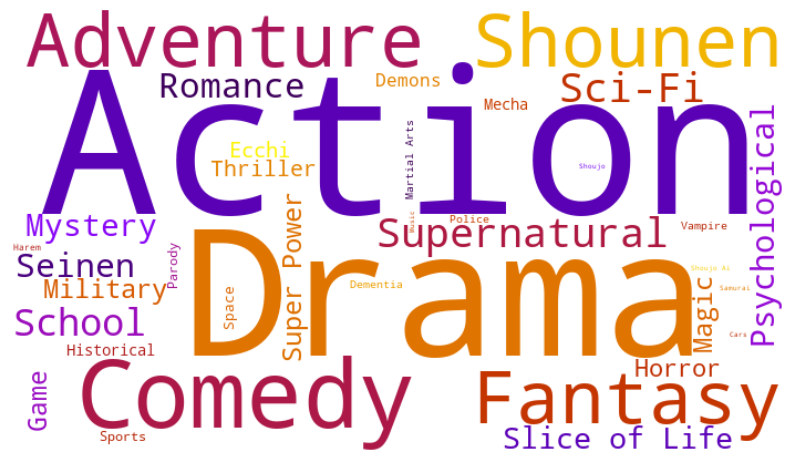

> animes highly rated by this user


,eng_version,Genres
3971,Fullmetal Alchemist:Brotherhood,"Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen"
15926,Attack on Titan Final Season,"Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen"
5683,Steins;Gate,"Thriller, Sci-Fi"
14963,Attack on Titan Season 3 Part 2,"Action, Drama, Fantasy, Military, Mystery, Shounen, Super Power"
6474,Hunter x Hunter,"Action, Adventure, Fantasy, Shounen, Super Power"


In [32]:
user_pref = get_user_preferences(random_user, plot=True, verbose=1)
print('> animes highly rated by this user')

pd.DataFrame(user_pref).head(5)

## **Task 3**: **Recommending** animes for a user

In [33]:
def get_recommended_animes(similar_users, n=10):
    recommended_animes = []
    anime_list = []
    
    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id), verbose=0)
        pref_list = pref_list[~ pref_list.eng_version.isin(user_pref.eng_version.values)]
        anime_list.append(pref_list.eng_version.values)
        
    anime_list = pd.DataFrame(anime_list)
    sorted_list = pd.DataFrame(pd.Series(anime_list.values.ravel()).value_counts()).head(n)
    
    for i, anime_name in enumerate(sorted_list.index):        
        n_user_pref = sorted_list[sorted_list.index == anime_name].values[0][0]
        if isinstance(anime_name, str):
            try:
                frame = getAnimeFrame(anime_name)
                anime_id = frame.anime_id.values[0]
                genre = frame.Genres.values[0]
                sypnopsis = getSypnopsis(int(anime_id))
                recommended_animes.append({#"anime_id": anime_id ,
                                            "n": n_user_pref,
                                            "anime_name": anime_name, 
                                            "Genres": genre, 
                                            "sypnopsis": sypnopsis})
            except:
                pass
    
    return pd.DataFrame(recommended_animes)

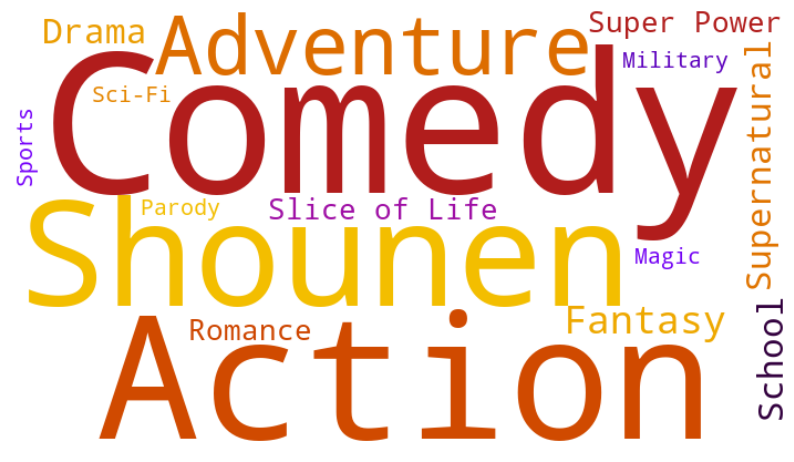


> Top recommendations for user: 323306


,n,anime_name,Genres,sypnopsis
0,4,GATE,"Action, Military, Adventure, Fantasy","Several months have passed since the infamous Ginza Incident, with tensions between the Empire and JSDF escalating in the vast and mysterious ""Special Region"" over peace negotiations. The greed and curiosity of the global powers have also begun to grow, as reports about the technological limitations of the magical realm's archaic civilizations come to light. Meanwhile, Lieutenant Youji Itami and his merry band of female admirers struggle to navigate the complex political intrigue that plagues the Empire's court. Despite her best efforts, Princess Piña Co Lada faces difficulties attempting to convince her father that the JSDF has no intention of conquering their kingdom. Pressured from both sides of the Gate, Itami must consider even more drastic measures to fulfill his mission."
1,4,Great Teacher Onizuka,"Slice of Life, Comedy, Drama, School, Shounen","Twenty-two-year-old Eikichi Onizuka—ex-biker gang leader, conqueror of Shonan, and virgin—has a dream: to become the greatest high school teacher in all of Japan. This isn't because of a passion for teaching, but because he wants a loving teenage wife when he's old and gray. Still, for a perverted, greedy, and lazy delinquent, there is more to Onizuka than meets the eye. So when he lands a job as the homeroom teacher of the Class 3-4 at the prestigious Holy Forest Academy—despite suplexing the Vice Principal—all of his talents are put to the test, as this class is particularly infamous. Due to their utter contempt for all teachers, the class' students use psychological warfare to mentally break any new homeroom teacher they get, forcing them to quit and leave school. However, Onizuka isn't your average teacher, and he's ready for any challenge in his way. Bullying, suicide, and sexual harassment are just a few of the issues his students face daily. By tackling the roots of their problems, Onizuka supports them with his unpredictable and unconventional methods—even if it means jumping off a building to save a suicidal child. Thanks to his eccentric charm and fun-loving nature, Class 3-4 slowly learns just how enjoyable school can be when you're the pupils of the Great Teacher Onizuka."
2,4,Fairy Tail,"Action, Adventure, Comedy, Magic, Fantasy, Shounen","In the mystical land of Fiore, magic exists as an essential part of everyday life. Countless magic guilds lie at the core of all magical activity, and serve as venues for like-minded mages to band together and take on job requests. Among them, Fairy Tail stands out from the rest as a place of strength, spirit, and family. Lucy Heartfilia is a young mage searching for celestial gate keys, and her dream is to become a full-fledged wizard by joining this famous guild. In her search, she runs into Natsu Dragneel and his partner Happy, who are on a quest to find Natsu's foster father, the dragon Igneel. Upon being tricked by a man, Lucy falls under an abduction attempt, only to be saved by Natsu. To her shock, he reveals that he is a member of Fairy Tail and invites her to join them. There, Lucy meets the guild's strange members, such as the ice wizard Gray Fullbuster and magic swordswoman Erza Scarlet. Together as a family, they battle the forces of evil, help those in need, and gain new friends, all the while enjoying the never-ending adventure that is Fairy Tail."
3,4,Kuroko's Basketball Special,"Sports, Comedy, School, Shounen","Episode 22.5 bundled with BD/DVD volume 8. The episode covers Kuroko's past, when he was part of the ""Generation of Miracles."""
4,4,Bleach,"Action, Adventure, Comedy, Super Power, Supernatural, Shounen","Ichigo Kurosaki is an ordinary high schooler—until his family is attacked by a Hollow, a corrupt spirit that seeks to devour human souls. It is then that he meets a Soul Reaper named Rukia Kuchiki, who gets injured while protecting Ichigo's family from the assailant. To save his family, Ichigo accepts Rukia's offer of taking

In [34]:
recommended_animes = get_recommended_animes(similar_users, n=10)
getFavGenre(recommended_animes, plot=True)

print('\n> Top recommendations for user: {}'.format(random_user))
recommended_animes

## **Ranking based Recommendation**

In [35]:
print("Showing recommendations for user: {}".format(random_user))
print("===" * 25)

animes_watched_by_user = rating_df[rating_df.user_id==random_user]
anime_not_watched_df = df[
    ~df["anime_id"].isin(animes_watched_by_user.anime_id.values)
]

anime_not_watched = list(
    set(anime_not_watched_df['anime_id']).intersection(set(anime2anime_encoded.keys()))
)

anime_not_watched = [[anime2anime_encoded.get(x)] for x in anime_not_watched]

user_encoder = user2user_encoded.get(random_user)

user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

user_anime_array = [user_anime_array[:, 0], user_anime_array[:, 1]]
ratings = model.predict(user_anime_array).flatten()

top_ratings_indices = (-ratings).argsort()[:10]

recommended_anime_ids = [
    anime_encoded2anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
]

Results = []
top_rated_ids = []

for index, anime_id in enumerate(anime_not_watched):
    rating = ratings[index]
    id_ = anime_encoded2anime.get(anime_id[0])
    
    if id_ in recommended_anime_ids:
        top_rated_ids.append(id_)
        try:
            condition = (df.anime_id == id_)
            name = df[condition]['eng_version'].values[0]
            genre = df[condition].Genres.values[0]
            score = df[condition].Score.values[0]
            sypnopsis = getSypnopsis(int(id_))
        except:
            continue
            
        Results.append({#"anime_id": id_, 
                        "name": name, 
                        "pred_rating": rating,
                        "genre": genre, 
                        'sypnopsis': sypnopsis})

print("---" * 25)
print("> Top 10 anime recommendations")
print("---" * 25)


Results = pd.DataFrame(Results).sort_values(by='pred_rating', ascending=False)
Results

Showing recommendations for user: 323306
534/534 [==============================] - 0s 615us/step
---------------------------------------------------------------------------
> Top 10 anime recommendations
---------------------------------------------------------------------------


,name,pred_rating,genre,sypnopsis
3,Food Wars! The Third Plate:Totsuki Train Arc,0.849760,"Ecchi, School, Shounen","dark age of cooking befalls Tootsuki Culinary Academy. With the Elite Ten's devastating coup d'état, Azami Nakiri is now the director of the prestigious school. Students must now conform to Azami's ideology of ""true gourmet food"" and are forbidden to express creativity, or else face expulsion. However, Souma Yukihira and the members of the Polar Star Dormitory refuse to accept these changes. Aided by other rebellious first-years, including the tenth seat, Erina Nakiri, Souma and his allies band together to fight off supporters of Azami's regime. But corrupt instructors and the menacing Central organization stand in their way, and so they must work together, harder than ever before, to survive every underhanded plot designed to banish them from the school."
9,Kuroko no Basket Movie 4: Last Game,0.839758,"Sports, School, Shounen","Hailing from America, Jabberwock—a street basketball team with skills comparable to those of the NBA—has come to Japan to play an exhibition match against Strky, a team of former third-year students who once played in the Interhigh and Winter Cup. However, due to the vast difference in skill, Jabberwock easily wins. Their captain, Nash Gold Jr., mocks the basketball style of all players in Japan by comparing them to monkeys. Infuriated by the nasty comment, Kagetora Aida challenges them to a revenge match. Because of pride and the belief that the results will be no different, Nash accepts the challenge. Kagetora then assembles Vorpal Swords, a team composed of the Generation of Miracles, including Kuroko Tetsuya and Kagami Taiga, for they are the only ones who stand a chance against a foe that seems unbeatable from every angle."
4,Is It Wrong to Try to Pick Up Girls in a Dungeon? II,0.837024,"Action, Adventure, Comedy, Romance, Fantasy","It is business as usual in the massive city of Orario, where legions of adventurers gather to explore the monster-infested ""Dungeon."" Among them is the easily flustered yet brave Bell Cranel, the sole member of the Hestia Familia. With the help of his demi-human supporter Liliruca Arde and competent blacksmith Welf Crozzo, Bell has earned the title of Little Rookie by becoming Orario's fastest-growing adventurer thanks to his endeavors within the deeper levels of the Dungeon. Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka II continues Bell's adventures as he tries to bring glory to his goddess and protect those he cares about. However, various familias and gods across the city begin to take notice of his achievements and attempt to add him to their ranks."
0,ONE PIECE FILM GOLD 〜episode 0〜 711ver.,0.835889,"Action, Adventure, Comedy, Super Power, Fantasy, Shounen","short prequel to One Piece Film: Gold featuring the nine Straw hat crew members on the ship, planning what to do when they arrive the Casino."
5,High School DxD Hero: Taiikukan-ura no Holy,0.832468,"Action, Comedy, Demons, Ecchi, Harem, Romance, School",lternative version of final four episodes of High School DxD BorN .
1,Food Wars! The Third Plate,0.827273,"Ecchi, School, Shounen","The Moon Festival is Tootsuki Academy's annual gourmet gala, where students compete against each other to earn the most profit through selling their cuisine of choice. But for Souma Yukihira, it is also his first opportunity to challenge the Elite Ten, the supreme council that rules over the academy. However, this is only the beginning of Souma's war against the Elite Ten; a nefarious plot is underway that will provide Souma with the challenge he desires but will also shake the very foundations of Tootsuki Academy itself."
2,Recovery of an MMO Junkie Special,0.824547,"Game, Comedy, Romance","uch to her dismay, Moriko Morioka's computer has broken down. However, not all is lost as she remembers that Yuuta Sakurai is a computer geek, leading Morioka to seek his expertise. But when Sakurai visits to help 

In [36]:
model.save('anime_model.h5')

from IPython.display import FileLink
FileLink(r'./anime_model.h5')

C:\Users\subas\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


C:\Users\subas\anime_model.h5

In [43]:
from sklearn.metrics import mean_squared_error

# Assuming 'model' is your trained model, and 'X_test_array', 'y_test' are your test data

# Generate predictions for the test data
y_pred = model.predict(X_test_array).flatten()

# Calculate the RMSE score
rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE Score: ", rmse_score)

313/313 [==============================] - 1s 2ms/step
RMSE Score:  0.29581807081742884
